In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

mataura pf
governador valadares br
tabas ir
samusu ws
ushuaia ar
saskylakh ru
anadyr ru
qaanaaq gl
butaritari ki
jamestown sh
hofn is
mount gambier au
bowen au
campo alegre br
ushuaia ar
hithadhoo mv
punta arenas cl
nikolskoye ru
nizhneyansk ru
dukhovshchina ru
qaanaaq gl
komsomolskiy ru
tiksi ru
butaritari ki
kapaa us
hermanus za
mataura pf
hamilton bm
nyurba ru
rikitea pf
port-gentil ga
marquette us
zhenlai cn
kandrian pg
gimli ca
cidreira br
taolanaro mg
aklavik ca
ribeira grande pt
mahina pf
rikitea pf
barrow us
san juan ar
kapaa us
ushuaia ar
vaini to
yellowknife ca
jamestown sh
carnarvon au
busselton au
jamestown sh
puerto ayora ec
hithadhoo mv
vaini to
nome us
ancud cl
pangai to
busselton au
aksu cn
atuona pf
puerto ayora ec
ilulissat gl
rikitea pf
taolanaro mg
lebu cl
yellowknife ca
hermanus za
hithadhoo mv
nemuro jp
whitehorse ca
luanda ao
port hardy ca
busselton au
kapaa us
waddan ly
sawtell au
sorvag fo
pisco pe
aklavik ca
belaya gora ru
codrington ag
ushuaia ar
castro cl
ta

punta arenas cl
marondera zw
hobart au
pahrump us
butaritari ki
hithadhoo mv
yellowknife ca
rikitea pf
quatre cocos mu
sitka us
port elizabeth za
nouadhibou mr
ushuaia ar
krutinka ru
ewa beach us
cherskiy ru
pilas es
bluff nz
abnub eg
mahebourg mu
albany au
esperance au
tasiilaq gl
kharakvasla in
marcona pe
faya td
vaini to
gangtok in
saint-joseph re
ribeira grande pt
hasaki jp
port alfred za
marcona pe
bluff nz
karaul ru
neyshabur ir
port alfred za
busselton au
lorengau pg
ketchikan us
guerrero negro mx
barentsburg sj
sitka us
ushuaia ar
hilo us
arraial do cabo br
ouadda cf
mataura pf
kutum sd
rikitea pf
punta arenas cl
caravelas br
carnarvon au
lardos gr
atuona pf
bredasdorp za
kyaikkami mm
thompson ca
saskylakh ru
inhambane mz
carndonagh ie
taoudenni ml
mataura pf
rio grande br
kindu cd
vaini to
taolanaro mg
upernavik gl
new norfolk au
saint george bm
samusu ws
mandera ke
hobart au
rikitea pf
belushya guba ru
concepcion py
constitucion mx
albany au
hobart au
new norfolk au
zhigansk 

hithadhoo mv
hofn is
khatanga ru
port alfred za
ushuaia ar
hithadhoo mv
dikson ru
butaritari ki
attawapiskat ca
kazminskoye ru
bredasdorp za
nanortalik gl
sao jose da coroa grande br
dingle ie
rikitea pf
kahului us
along in
kaitangata nz
sao filipe cv
talnakh ru
faanui pf
hofn is
thinadhoo mv
lodja cd
ushuaia ar
yeniseysk ru
vila franca do campo pt
cape town za
ushuaia ar


In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

647

In [7]:
# Import the requests library.
import requests

# IMport the API key
from config import weather_api_key


In [8]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=995296a166e2a2d479dc0ff13f817281


In [9]:
# Import the datetime module from the datetime library
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning fo the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

# create counters
record_count = 1
set_count = 1


Beginning Data Retrieval     
-----------------------------


In [11]:
# Loop through all the cities in our list
for i in range(len(cities)):
    
    # Group cities in sets of 50 for loggin purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city
    city_url = url + "&q=" + "i"

In [12]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 13 | mataura
Processing Record 2 of Set 13 | governador valadares
Processing Record 3 of Set 13 | tabas
Processing Record 4 of Set 13 | samusu
City not found. Skipping...
Processing Record 5 of Set 13 | ushuaia
Processing Record 6 of Set 13 | saskylakh
Processing Record 7 of Set 13 | anadyr
Processing Record 8 of Set 13 | qaanaaq
Processing Record 9 of Set 13 | butaritari
Processing Record 10 of Set 13 | jamestown
Processing Record 11 of Set 13 | hofn
Processing Record 12 of Set 13 | mount gambier
Processing Record 13 of Set 13 | bowen
Processing Record 14 of Set 13 | campo alegre
Processing Record 15 of Set 13 | hithadhoo
Processing Record 16 of Set 13 | punta arenas
Processing Record 17 of Set 13 | nikolskoye
Processing Record 18 of Set 13 | nizhneyansk
City not found. Skipping...
Processing Record 19 of Set 13 | dukhovshchina
Processing Record 20 of Set 13 | komsomolskiy
Processing Record 21 of Set 13 | tiksi
Processing Record 22 of Set 13 | kapaa
Processi

Processing Record 34 of Set 16 | cherskiy
Processing Record 35 of Set 16 | bambanglipuro
Processing Record 36 of Set 16 | belyy yar
Processing Record 37 of Set 16 | atasu
Processing Record 38 of Set 16 | boguchany
Processing Record 39 of Set 16 | nishihara
Processing Record 40 of Set 16 | puerto leguizamo
Processing Record 41 of Set 16 | monte carmelo
Processing Record 42 of Set 16 | kodiak
Processing Record 43 of Set 16 | sontra
Processing Record 44 of Set 16 | great falls
Processing Record 45 of Set 16 | inhambane
Processing Record 46 of Set 16 | arraial do cabo
Processing Record 47 of Set 16 | mutsamudu
City not found. Skipping...
Processing Record 48 of Set 16 | borlange
City not found. Skipping...
Processing Record 49 of Set 16 | benjamin constant
Processing Record 50 of Set 16 | poum
Processing Record 1 of Set 17 | pochutla
Processing Record 2 of Set 17 | astipalaia
City not found. Skipping...
Processing Record 3 of Set 17 | ponta delgada
Processing Record 4 of Set 17 | tela
Proc

Processing Record 19 of Set 20 | ewa beach
Processing Record 20 of Set 20 | pilas
Processing Record 21 of Set 20 | abnub
Processing Record 22 of Set 20 | kharakvasla
Processing Record 23 of Set 20 | marcona
City not found. Skipping...
Processing Record 24 of Set 20 | gangtok
Processing Record 25 of Set 20 | saint-joseph
Processing Record 26 of Set 20 | karaul
City not found. Skipping...
Processing Record 27 of Set 20 | ketchikan
Processing Record 28 of Set 20 | guerrero negro
Processing Record 29 of Set 20 | ouadda
Processing Record 30 of Set 20 | kutum
Processing Record 31 of Set 20 | caravelas
Processing Record 32 of Set 20 | lardos
Processing Record 33 of Set 20 | kyaikkami
Processing Record 34 of Set 20 | thompson
Processing Record 35 of Set 20 | carndonagh
Processing Record 36 of Set 20 | taoudenni
Processing Record 37 of Set 20 | kindu
Processing Record 38 of Set 20 | mandera
Processing Record 39 of Set 20 | concepcion
Processing Record 40 of Set 20 | zhigansk
Processing Record 4

Processing Record 6 of Set 24 | kushmurun
Processing Record 7 of Set 24 | tiznit
Processing Record 8 of Set 24 | lebork
Processing Record 9 of Set 24 | sungairaya
Processing Record 10 of Set 24 | nueve de julio
Processing Record 11 of Set 24 | kehl
Processing Record 12 of Set 24 | balkanabat
Processing Record 13 of Set 24 | mataram
Processing Record 14 of Set 24 | along
Processing Record 15 of Set 24 | isangel
Processing Record 16 of Set 24 | marsabit
Processing Record 17 of Set 24 | dudinka
Processing Record 18 of Set 24 | ceres
Processing Record 19 of Set 24 | saint anthony
Processing Record 20 of Set 24 | ocos
Processing Record 21 of Set 24 | banikoara
Processing Record 22 of Set 24 | aitape
Processing Record 23 of Set 24 | port blair
Processing Record 24 of Set 24 | alice springs
Processing Record 25 of Set 24 | lac-megantic
Processing Record 26 of Set 24 | leningradskiy
Processing Record 27 of Set 24 | waipawa
Processing Record 28 of Set 24 | sabha
Processing Record 29 of Set 24 |

In [13]:
len(cities)

647

In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mataura,-46.19,168.86,46.00,95,100,5.01,NZ,2020-04-16 22:29:28
1,Governador Valadares,-18.85,-41.95,77.09,78,71,2.57,BR,2020-04-16 22:29:28
2,Tabas,33.60,56.92,64.40,55,8,4.70,IR,2020-04-16 22:29:28
3,Ushuaia,-54.80,-68.30,57.20,54,99,13.87,AR,2020-04-16 22:29:29
4,Saskylakh,71.92,114.08,-12.35,89,0,0.76,RU,2020-04-16 22:29:29
5,Anadyr,64.75,177.48,14.00,92,20,15.66,RU,2020-04-16 22:29:29
6,Qaanaaq,77.48,-69.36,15.87,83,100,0.98,GL,2020-04-16 22:29:29
7,Butaritari,3.07,172.79,83.71,76,100,12.26,KI,2020-04-16 22:29:30
8,Jamestown,42.10,-79.24,39.20,47,90,19.46,US,2020-04-16 22:28:26
9,Hofn,64.25,-15.21,40.39,70,50,9.40,IS,2020-04-16 22:29:30


In [15]:
# Change the column header orders
new_column_order = ["City", 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mataura,NZ,2020-04-16 22:29:28,-46.19,168.86,46.00,95,100,5.01
1,Governador Valadares,BR,2020-04-16 22:29:28,-18.85,-41.95,77.09,78,71,2.57
2,Tabas,IR,2020-04-16 22:29:28,33.60,56.92,64.40,55,8,4.70
3,Ushuaia,AR,2020-04-16 22:29:29,-54.80,-68.30,57.20,54,99,13.87
4,Saskylakh,RU,2020-04-16 22:29:29,71.92,114.08,-12.35,89,0,0.76


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_data into CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevent fields from the datafrome pr plotting
lats = city_data_df['Lat']
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [18]:
import time

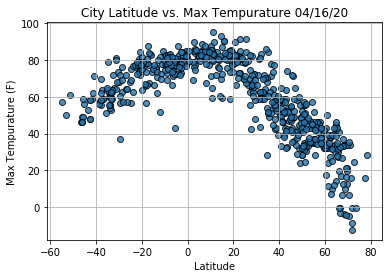

In [22]:
# Build the scatter plot for latitude vs. max tempurature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
# Incorporate the other graph proterties.
plt.title(f"City Latitude vs. Max Tempurature " + time.strftime("%x"))
plt.ylabel("Max Tempurature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/fig1.png")

# show the plot.
plt.show()

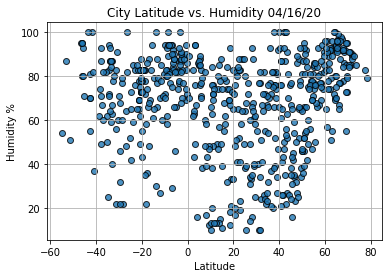

In [23]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
# Incorporate the other graph proterties.
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.ylabel("Humidity %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/fig2.png")

# show the plot.
plt.show()

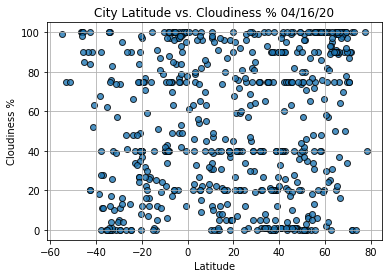

In [24]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
# Incorporate the other graph proterties.
plt.title(f"City Latitude vs. Cloudiness % " + time.strftime("%x"))
plt.ylabel("Cloudiness %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/fig3.png")

# show the plot.
plt.show()

In [ ]:
# Build the scatter plots for latitude vs wind speed
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
# Incorporate the other graph proterties.
plt.title(f"City Latitude vs.Wind Speed " + time.strftime("%x"))
plt.ylabel("Cloudiness %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/fig4.png")

# show the plot.
plt.show()